# Project 3 - 01 : Data cleaning / EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import json
from scipy import stats

# config
sns.set()
sns.set_style("dark")
%matplotlib inline
plt.style.use('fivethirtyeight')

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

pd.options.display.max_colwidth = 500

## Cleaning Data

In [2]:
# Data 2015 Import
data2015 = pd.read_csv('Pelec_04_data/2015-building-energy-benchmarking.csv', sep=',')
print("Dataset 2015 : {} rows / {} columns".format(data2015.shape[0], data2015.shape[1]))

Dataset 2015 : 3340 rows / 47 columns


In [3]:
data2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{""address"": ""405 OLIVE WAY"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1927,1,12.000,88434,0,88434,Hotel,Hotel,88434.000,NaN,NaN,NaN,NaN,NaN,65.000,78.900,80.300,173.500,175.100,6981428.000,7097539.000,2023032.000,1080307.000,3686160.000,12724.000,1272388.000,0.000,249.430,2.640,No,NaN,Compliant,NaN,NaN,14.000,NaN,31.000,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122.33335756', 'human_address': '{""address"": ""724 PINE ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1996,1,11.000,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.000,Parking,15064.000,Restaurant,4622.000,NaN,51.000,94.400,99.000,191.300,195.200,8354235.000,8765788.000,0.000,1144563.000,3905411.000,44490.000,4448985.000,0.000,263.510,2.380,No,NaN,Compliant,NaN,NaN,14.000,NaN,31.000,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122.33769944', 'human_address': '{""address"": ""1900 5TH AVE"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1969,1,41.000,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.000,Parking,100000.000,Swimming Pool,0.000,NaN,18.000,96.600,99.700,242.700,246.500,73130656.000,75506272.000,19660404.000,14583930.000,49762435.000,37099.000,3709900.000,0.000,2061.480,1.920,Yes,NaN,Compliant,NaN,NaN,56.000,NaN,31.000,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122.33660889', 'human_address': '{""address"": ""620 STEWART ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1926,1,10.000,61320,0,61320,Hotel,Hotel,61320.000,NaN,NaN,NaN,NaN,NaN,1.000,460.400,462.500,636.300,643.200,28229320.000,28363444.000,23458518.000,811521.000,2769023.000,20019.000,2001894.000,0.000,1936.340,31.380,No,NaN,Compliant,High Outlier,NaN,56.000,NaN,31.000,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122.3409238', 'human_address': '{""address"": ""401 LENORA ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98121""}'}",7,DOWNTOWN,1980,1,18.000,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.000,Parking,68009.000,Swimming Pool,0.000,NaN,67.000,120.100,122.100,228.800,227.100,14829099.000,15078243.000,0.000,1777841.000,6066245.000,87631.000,8763105.000,0.000,507.700,4.020,No,NaN,Compliant,NaN,NaN,56.000,NaN,31.000,19576


In [4]:
data2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [5]:
# Data 2016 Import
data2016 = pd.read_csv('Pelec_04_data/2016-building-energy-benchmarking.csv', sep=',')
print("Dataset 2016 : {} rows / {} columns".format(data2016.shape[0], data2016.shape[1]))

Dataset 2016 : 3376 rows / 46 columns


In [6]:
data2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.000,0659000030,7,DOWNTOWN,47.612,-122.338,1927,1.000,12,88434,0,88434,Hotel,Hotel,88434.000,NaN,NaN,NaN,NaN,NaN,60.000,81.700,84.300,182.500,189.000,7226362.500,7456910.000,2003882.000,1156514.250,3946027.000,12764.529,1276453.000,False,NaN,Compliant,NaN,249.980,2.830
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.000,0659000220,7,DOWNTOWN,47.613,-122.334,1996,1.000,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.000,Parking,15064.000,Restaurant,4622.000,NaN,61.000,94.800,97.900,176.100,179.400,8387933.000,8664479.000,0.000,950425.188,3242851.000,51450.816,5145082.000,False,NaN,Compliant,NaN,295.860,2.860
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.000,0659000475,7,DOWNTOWN,47.614,-122.338,1969,1.000,41,956110,196718,759392,Hotel,Hotel,756493.000,NaN,NaN,NaN,NaN,NaN,43.000,96.000,97.700,241.900,244.100,72587024.000,73937112.000,21566554.000,14515435.000,49526664.000,14938.000,1493800.000,False,NaN,Compliant,NaN,2089.280,2.190
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.000,0659000640,7,DOWNTOWN,47.614,-122.337,1926,1.000,10,61320,0,61320,Hotel,Hotel,61320.000,NaN,NaN,NaN,NaN,NaN,56.000,110.800,113.300,216.200,224.000,6794584.000,6946800.500,2214446.250,811525.312,2768924.000,18112.131,1811213.000,False,NaN,Compliant,NaN,286.430,4.670
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.000,0659000970,7,DOWNTOWN,47.614,-122.340,1980,1.000,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.000,Parking,68009.000,Swimming Pool,0.000,NaN,75.000,114.800,118.700,211.400,215.600,14172606.000,14656503.000,0.000,1573448.625,5368607.000,88039.984,8803998.000,False,NaN,Compliant,NaN,505.010,2.880


In [7]:
data2016.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

### Unify columns

**Load columns metadata**

In [8]:
# Get the columns metadata 
with open("Pelec_04_data/socrata_metadata_2015-building-energy-benchmarking.json", "r") as read_file:
    metadata2015 = json.load(read_file)
with open("Pelec_04_data/socrata_metadata_2016-building-energy-benchmarking.json", "r") as read_file:
    metadata2016 = json.load(read_file)
# drop root metadata
metadata2015 = metadata2015['columns']
metadata2016 = metadata2016['columns']
# parse to dataframe
metadata2015 = pd.json_normalize(metadata2015)
metadata2016 = pd.json_normalize(metadata2016)

**Difference between columns**

In [9]:
list(list(set(data2015.columns)-set(data2016.columns)) + list(set(data2016.columns)-set(data2015.columns)))

['Location',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 '2010 Census Tracts',
 'Comment',
 'OtherFuelUse(kBtu)',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'Zip Codes',
 'GHGEmissions(MetricTonsCO2e)',
 'SPD Beats',
 'City Council Districts',
 'Comments',
 'State',
 'Address',
 'City',
 'ZipCode',
 'Latitude',
 'Longitude',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

In [10]:
# Chech descriptions for (GHGEmissions(MetricTonsCO2e) / TotalGHGEmissions) and (GHGEmissionsIntensity(kgCO2e/ft2) / GHGEmissionsIntensity)
print('GHGEmissions(MetricTonsCO2e)=', metadata2015['description'][metadata2015['name']=='GHGEmissions(MetricTonsCO2e)'])
print('\nTotalGHGEmissions=', metadata2016['description'][metadata2016['name']=='TotalGHGEmissions'])
print('\nGHGEmissionsIntensity(kgCO2e/ft2)=', metadata2015['description'][metadata2015['name']=='GHGEmissionsIntensity(kgCO2e/ft2)'])
print('\nGHGEmissionsIntensity=', metadata2016['description'][metadata2016['name']=='GHGEmissionsIntensity'])
print('\outlier=', metadata2016['description'][metadata2016['name']=='outlier'])

GHGEmissions(MetricTonsCO2e)= 36    The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Po...
Name: description, dtype: object

TotalGHGEmissions= 44    The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.4

**Renaming columns to assemble those that are clearly the same**

In [11]:
data2015.rename(columns={'Zip Codes':'zipcode',
                         'Comment':'comment',
                         'GHGEmissions(MetricTonsCO2e)':'GHG_emissions_TCO2e',
                         'GHGEmissionsIntensity(kgCO2e/ft2)':'GHG_intensity_kgCO2e_ft2'}, inplace=True)

In [12]:
data2016.rename(columns={'Address':'address',
                         'City':'city',
                         'State':'state',
                         'ZipCode':'zipcode',
                         'Latitude':'latitude',
                         'Longitude':'longitude',
                         'Comments':'comment',
                         'TotalGHGEmissions':'GHG_emissions_TCO2e', 
                         'GHGEmissionsIntensity':'GHG_intensity_kgCO2e_ft2'}, inplace=True)

**Parsing json in 'Location' column for data2015**

In [13]:
# display json struct
print(data2015['Location'][0])

{'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}


In [14]:
# correctly format json 
data2015['Location'] = (data2015
                    .Location
                    .astype(str)
                    .apply(lambda x: x.replace("'", "\""))
                    .apply(lambda x: x.replace("\"{", "{"))
                    .apply(lambda x: x.replace("}\"", "}")))
data2015.replace('nan', np.nan, inplace=True)
print(data2015['Location'][0])

{"latitude": "47.61219025", "longitude": "-122.33799744", "human_address": {"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}}


In [15]:
# parse json column into new df
rows = []
for i in range(data2015['Location'].shape[0]):
    if type(data2015['Location'][i]) == str :
        row_df = pd.json_normalize(json.loads(data2015['Location'][i]))    
        rows.append(row_df.values[0])
    else:
        rows.append([np.nan,np.nan,np.nan,np.nan,np.nan])
        
len(rows)

3340

In [16]:
# add new columns to data
data2015 = data2015.join(pd.DataFrame(rows, columns=['longitude', 'latitude', 'address', 'city', 'state', 'loc.zip']))

In [17]:
# drop column 'location'
data2015.drop(columns=['Location'], inplace=True)

In [18]:
print('Single columns remaining :')
list(list(set(data2015.columns)-set(data2016.columns)) + list(set(data2016.columns)-set(data2015.columns)))

Single columns remaining :


['loc.zip',
 'OtherFuelUse(kBtu)',
 'Seattle Police Department Micro Community Policing Plan Areas',
 '2010 Census Tracts',
 'SPD Beats',
 'City Council Districts']

To know which column to keep between 'zipcode' and 'loc.zip' for 2015 data, I compare these columns to the 2016 zipcodes and I will remove the one without duplicates

In [19]:
print("2015 'zipcode' == 2016 'zipcode' :",data2016[data2016['zipcode'].astype(float).isin(data2015['zipcode'].astype(float))].shape[0])
print("2015 'loc.zip' == 2016 'zipcode' :",data2016[data2016['zipcode'].astype(float).isin(data2015['loc.zip'].astype(float))].shape[0])

2015 'zipcode' == 2016 'zipcode' : 0
2015 'loc.zip' == 2016 'zipcode' : 3317


In [20]:
# replace 'zipcode' values by 'loc.zip' values
data2015['zipcode'] = data2015['loc.zip']
# drop loc.zip column
data2015.drop(columns=['loc.zip'], inplace=True)

In [21]:
data = pd.concat([data2015, data2016], ignore_index=True)
print("Total data : {} rows / {} columns".format(data.shape[0], data.shape[1]))
data

Total data : 6716 rows / 51 columns


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHG_emissions_TCO2e,GHG_intensity_kgCO2e_ft2,DefaultData,comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,zipcode,longitude,latitude,address,city,state
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.000,12.000,88434,0,88434,Hotel,Hotel,88434.000,NaN,NaN,NaN,NaN,NaN,65.000,78.900,80.300,173.500,175.100,6981428.000,7097539.000,2023032.000,1080307.000,3686160.000,12724.000,1272388.000,0.000,249.430,2.640,No,NaN,Compliant,NaN,NaN,14.000,NaN,31.000,98101,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.000,11.000,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.000,Parking,15064.000,Restaurant,4622.000,NaN,51.000,94.400,99.000,191.300,195.200,8354235.000,8765788.000,0.000,1144563.000,3905411.000,44490.000,4448985.000,0.000,263.510,2.380,No,NaN,Compliant,NaN,NaN,14.000,NaN,31.000,98101,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.000,41.000,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.000,Parking,100000.000,Swimming Pool,0.000,NaN,18.000,96.600,99.700,242.700,246.500,73130656.000,75506272.000,19660404.000,14583930.000,49762435.000,37099.000,3709900.000,0.000,2061.480,1.920,Yes,NaN,Compliant,NaN,NaN,56.000,NaN,31.000,98101,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.000,10.000,61320,0,61320,Hotel,Hotel,61320.000,NaN,NaN,NaN,NaN,NaN,1.000,460.400,462.500,636.300,643.200,28229320.000,28363444.000,23458518.000,811521.000,2769023.000,20019.000,2001894.000,0.000,1936.340,31.380,No,NaN,Compliant,High Outlier,NaN,56.000,NaN,31.000,98101,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.000,18.000,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.000,Parking,68009.000,Swimming Pool,0.000,NaN,67.000,120.100,122.100,228.800,227.100,14829099.000,15078243.000,0.000,1777841.000,6066245.000,87631.000,8763105.000,0.000,507.700,4.020,No,NaN,Compliant,NaN,NaN,56.000,NaN,31.000,98121,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,50222,2016,Nonresidential COS,Office,Horticulture building,1624049080,2,GREATER DUWAMISH,1990,1.000,1.000,12294,0,12294,Office,Office,12294.000,NaN,NaN,NaN,NaN,NaN,46.000,69.100,76.700,161.700,176.100,849745.688,943003.188,0.000,153655.000,524270.860,3254.750,325475.024,NaN,20.940,1.700,True,NaN,Error - Correct Default Data,NaN,NaN,NaN,NaN,NaN,NaN,-122.312,47.567,1600 S Dakota St,Seattle,WA
6712,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,3558300000,2,DOWNTOWN,2004,1.000,1.000,16000,0,16000,Other - Recreation,Other - Recreation,16000.000,NaN,NaN,NaN,NaN,NaN,NaN,59.400,65.900,114.200,118.900,950276.188,1053705.750,0.000,116221.000,396546.052,5537.300,553729.980,NaN,32.170,2.010,False,NaN,Compliant,NaN,NaN,NaN,NaN,NaN,NaN,-122.323,47.596,7

In [22]:
# Renaming columns for clarity
data.rename(columns={'DataYear':'dataYear', 
                     'BuildingType':'buildingType',
                     'PrimaryPropertyType':'primaryPropertyType',
                     'PropertyName':'property_name', 
                     'TaxParcelIdentificationNumber':'taxParcel_id', 
                     'CouncilDistrictCode':'councilDistrictCode',
                     'Neighborhood':'neighborhood',
                     'YearBuilt':'year_built',
                     'NumberofBuildings':'nb_buildings',
                     'NumberofFloors':'nb_floors',
                     'PropertyGFATotal':'propertyGFA_total',
                     'PropertyGFAParking':'propertyGFA_parking',
                     'PropertyGFABuilding(s)':'propertyGFABuilding',
                     'YearsENERGYSTARCertified':'yearsEnergystarCertified',
                     'ENERGYSTARScore':'energystar_score',
                     'SiteEUI(kBtu/sf)':'siteEUI_kBtu_sf',
                     'SiteEUIWN(kBtu/sf)':'siteEUIWN_kBtu_sf',
                     'SourceEUI(kBtu/sf)':'sourceEUI_kBtu_sf',
                     'SourceEUIWN(kBtu/sf)':'sourceEUIWN_kBtu_sf',
                     'SiteEnergyUse(kBtu)':'siteEnergyUse_kBtu',
                     'SiteEnergyUseWN(kBtu)':'siteEnergyUseWN_kBtu',
                     'SteamUse(kBtu)':'steamUse_kbtu',
                     'Electricity(kWh)':'electricity_kWh',
                     'Electricity(kBtu)':'electricity_kBtu',
                     'NaturalGas(therms)':'naturalGas_therms',
                     'NaturalGas(kBtu)':'naturalGas_kBtu',
                     'OtherFuelUse(kBtu)':'otherFuelUse_kBtu',
                     'GHGEmissions(MetricTonsCO2e)':'GHGEmissions_T_CO2e',
                     'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity_kgCO2e_ft2',
                     'DefaultData':'defaultData',
                     'ComplianceStatus':'complianceStatus',
                     'Outlier':'outlier',
                     '2010 Census Tracts':'2010_census_track',
                     'Seattle Police Department Micro Community Policing Plan Areas':'SPD_MCPP_areas',
                     'City Council Districts':'city_council_districts',
                     'SPD Beats':'SPD_beats',
                     'TotalGHGEmissions':'TotalGHGEmissions'
                    }, inplace=True)
data.columns

Index(['OSEBuildingID', 'dataYear', 'buildingType', 'primaryPropertyType',
       'property_name', 'taxParcel_id', 'councilDistrictCode', 'neighborhood',
       'year_built', 'nb_buildings', 'nb_floors', 'propertyGFA_total',
       'propertyGFA_parking', 'propertyGFABuilding',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'yearsEnergystarCertified',
       'energystar_score', 'siteEUI_kBtu_sf', 'siteEUIWN_kBtu_sf',
       'sourceEUI_kBtu_sf', 'sourceEUIWN_kBtu_sf', 'siteEnergyUse_kBtu',
       'siteEnergyUseWN_kBtu', 'steamUse_kbtu', 'electricity_kWh',
       'electricity_kBtu', 'naturalGas_therms', 'naturalGas_kBtu',
       'otherFuelUse_kBtu', 'GHG_emissions_TCO2e', 'GHG_intensity_kgCO2e_ft2',
       'defaultData', 'comment', 'complianceStatus', 'outlier',
       '2010_census_track', 'SPD_

In [23]:
data.dtypes.sort_values()

OSEBuildingID                        int64
propertyGFABuilding                  int64
propertyGFA_parking                  int64
year_built                           int64
councilDistrictCode                  int64
propertyGFA_total                    int64
dataYear                             int64
SPD_MCPP_areas                     float64
siteEnergyUse_kBtu                 float64
siteEnergyUseWN_kBtu               float64
steamUse_kbtu                      float64
electricity_kWh                    float64
electricity_kBtu                   float64
naturalGas_therms                  float64
naturalGas_kBtu                    float64
SPD_beats                          float64
sourceEUIWN_kBtu_sf                float64
otherFuelUse_kBtu                  float64
GHG_emissions_TCO2e                float64
city_council_districts             float64
GHG_intensity_kgCO2e_ft2           float64
2010_census_track                  float64
siteEUIWN_kBtu_sf                  float64
sourceEUI_k

In [24]:
# lower strings
for col in data.select_dtypes(include=object).columns:
    data[col] = data[col].str.lower()

In [25]:
# columns w/ no values for specific year
empty_cols_2015 = [col for col in data.columns if data[col][data['dataYear']==2015].isnull().all()]
empty_cols_2016 = [col for col in data.columns if data[col][data['dataYear']==2016].isnull().all()]
cols_to_fix = pd.concat([pd.DataFrame(data={'cols': empty_cols_2015, 'empty_for': ['2015' for x in range(len(empty_cols_2015))]}), pd.DataFrame(data={'cols': empty_cols_2016, 'empty_for': ['2016' for x in range(len(empty_cols_2016))]})], ignore_index=True)
cols_to_fix

,cols,empty_for
0,otherFuelUse_kBtu,2016
1,defaultData,2016
2,comment,2016
3,2010_census_track,2016
4,SPD_MCPP_areas,2016
5,city_council_districts,2016
6,SPD_beats,2016
7,zipcode,2016
8,longitude,2016
9,latitude,2016


### Irrelevant data

**Columns with a single value**

In [26]:
print(data.city.value_counts(dropna=False))
print(data.state.value_counts(dropna=False))
print(data.nb_buildings.value_counts(dropna=False)) # to keep

seattle    6716
Name: city, dtype: int64
wa    6716
Name: state, dtype: int64
1.000      6496
0.000        92
2.000        42
3.000        25
4.000        13
5.000        10
6.000         8
NaN           8
7.000         4
10.000        3
8.000         3
9.000         2
11.000        2
16.000        2
14.000        2
111.000       1
39.000        1
27.000        1
23.000        1
Name: nb_buildings, dtype: int64


In [27]:
data.drop(columns=['city', 'state'], inplace=True)

**Drop Residential buildings** (and types with only 1 value)

In [28]:
data['buildingType'].value_counts().sort_values()

nonresidential wa          1
campus                    46
nonresidential cos       153
sps-district k-12        197
multifamily hr (10+)     217
multifamily mr (5-9)    1134
multifamily lr (1-4)    2047
nonresidential          2921
Name: buildingType, dtype: int64

In [29]:
data = data[~data['buildingType'].isin(['multifamily hr (10+)', 'multifamily mr (5-9)', 'multifamily lr (1-4)'])]

In [30]:
data = data[data['buildingType'] != 'nonresidential wa']


In [31]:
print("Remaining data : {} rows / {} columns".format(data.shape[0], data.shape[1]))      

Remaining data : 3317 rows / 49 columns


In [32]:
data['buildingType'].value_counts().sort_values()

campus                  46
nonresidential cos     153
sps-district k-12      197
nonresidential        2921
Name: buildingType, dtype: int64

**Drop 2015 data row for duplicated buildings**

In [33]:
data[data.duplicated(['OSEBuildingID'])].shape

(1620, 49)

In [34]:
# sort by dataYear
data.sort_values('dataYear', inplace=True)
# drop oldest values for duplicates
data.drop_duplicates(subset='OSEBuildingID', keep='last', inplace=True)
print("Remaining data : {} rows / {} columns".format(data.shape[0], data.shape[1]))      

Remaining data : 1697 rows / 49 columns


**Useless features** 

In [35]:
cols = ['ListOfAllPropertyUseTypes', # list already broken down to the 3 biggest uses 
        'property_name', 
        'OSEBuildingID',
        'taxParcel_id',
        'address']
data.drop(columns=cols, inplace=True)

### Missing values

In [36]:
data.replace('nan', np.nan, inplace=True)

In [37]:
# Number of null values for each column
data.isnull().sum().sort_values()

dataYear                              0
complianceStatus                      0
propertyGFA_parking                   0
propertyGFA_total                     0
nb_floors                             0
propertyGFABuilding                   0
neighborhood                          0
councilDistrictCode                   0
primaryPropertyType                   0
buildingType                          0
year_built                            0
nb_buildings                          2
siteEnergyUse_kBtu                    3
GHG_intensity_kgCO2e_ft2              3
GHG_emissions_TCO2e                   3
naturalGas_kBtu                       3
naturalGas_therms                     3
electricity_kBtu                      3
electricity_kWh                       3
steamUse_kbtu                         3
sourceEUIWN_kBtu_sf                   3
sourceEUI_kBtu_sf                     3
siteEUIWN_kBtu_sf                     4
siteEUI_kBtu_sf                       4
siteEnergyUseWN_kBtu                  4


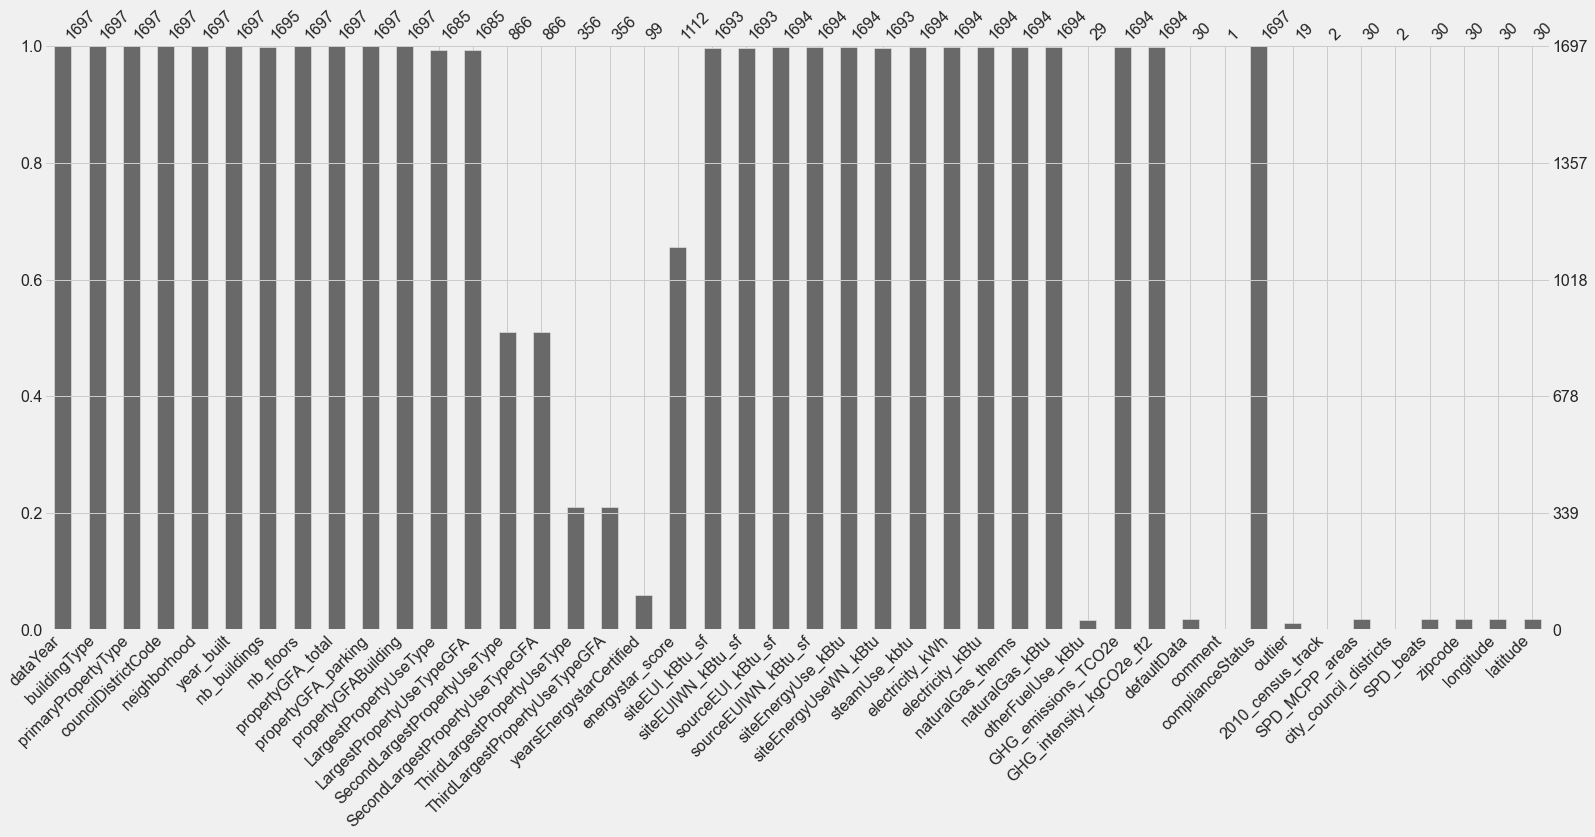

In [38]:
msno.bar(data)

In [39]:
# drop columns with less than 20% data 
data = data.dropna(axis=1, thresh= len(data)*0.2, how='all')
# drop empty rows
data = data.dropna(axis=0, how='all')
print("Remaining data : {} rows / {} columns".format(data.shape[0], data.shape[1]))      

Remaining data : 1697 rows / 32 columns


**Drop columns without data for 2016**

In [40]:
cols_to_fix = [col for col in data.columns if data[col][data['dataYear']==2016].isnull().all()]
data.drop(columns=cols_to_fix, inplace=True)
print("Remaining data : {} rows / {} columns".format(data.shape[0], data.shape[1]))      

Remaining data : 1697 rows / 32 columns


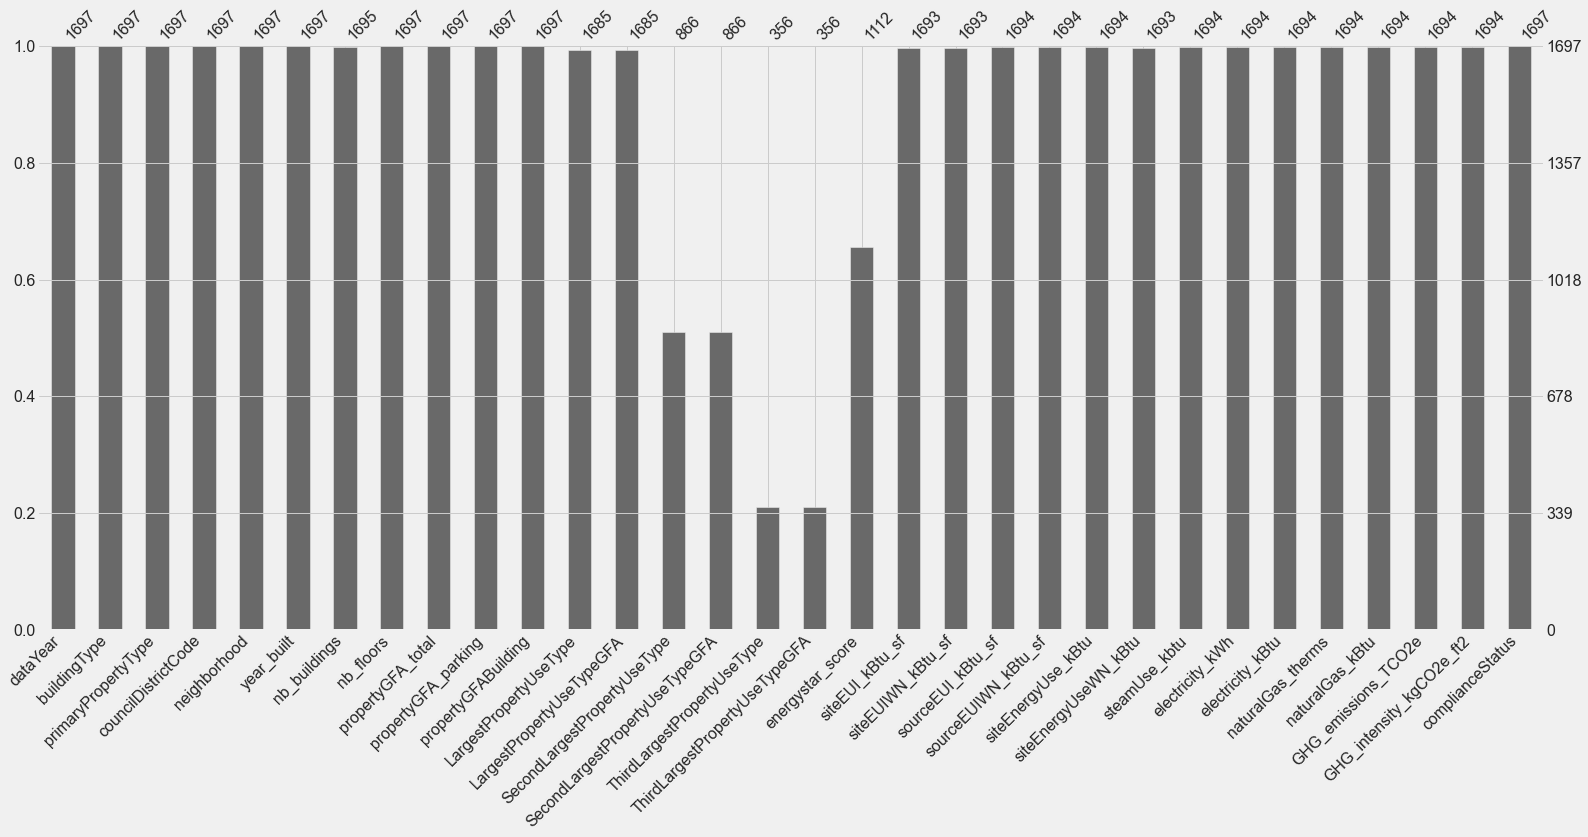

In [41]:
msno.bar(data)

In [42]:
data.isnull().sum().sort_values()

dataYear                              0
propertyGFABuilding                   0
propertyGFA_parking                   0
propertyGFA_total                     0
nb_floors                             0
complianceStatus                      0
neighborhood                          0
councilDistrictCode                   0
primaryPropertyType                   0
buildingType                          0
year_built                            0
nb_buildings                          2
sourceEUI_kBtu_sf                     3
steamUse_kbtu                         3
electricity_kWh                       3
electricity_kBtu                      3
sourceEUIWN_kBtu_sf                   3
naturalGas_therms                     3
naturalGas_kBtu                       3
GHG_emissions_TCO2e                   3
GHG_intensity_kgCO2e_ft2              3
siteEnergyUse_kBtu                    3
siteEnergyUseWN_kBtu                  4
siteEUI_kBtu_sf                       4
siteEUIWN_kBtu_sf                     4


### Outliers

In [43]:
data.describe()

,dataYear,councilDistrictCode,year_built,nb_buildings,nb_floors,propertyGFA_total,propertyGFA_parking,propertyGFABuilding,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,energystar_score,siteEUI_kBtu_sf,siteEUIWN_kBtu_sf,sourceEUI_kBtu_sf,sourceEUIWN_kBtu_sf,siteEnergyUse_kBtu,siteEnergyUseWN_kBtu,steamUse_kbtu,electricity_kWh,electricity_kBtu,naturalGas_therms,naturalGas_kBtu,GHG_emissions_TCO2e,GHG_intensity_kgCO2e_ft2
count,1697.000,1697.000,1697.000,1695.000,1697.000,1697.000,1697.000,1697.000,1685.000,866.000,356.000,1112.000,1693.000,1693.000,1694.000,1694.000,1694.000,1693.000,1694.000,1694.000,1694.000,1694.000,1694.000,1694.000,1694.000
mean,2015.982,4.369,1961.705,1.169,4.104,118529.959,13138.325,105391.634,98841.280,36938.482,14837.538,65.544,72.298,74.744,175.856,178.148,8479475.177,8121699.754,518579.705,1715040.747,5851723.458,19999.884,1999988.331,187.042,1.608
std,0.132,2.192,32.860,2.910,6.518,295548.355,43246.463,282021.928,275575.861,69874.595,36649.017,28.433,74.861,75.979,186.265,186.354,30242445.994,22236434.884,5492548.056,6071583.684,20716251.242,94909.907,9490990.909,755.553,2.336
min,2015.000,1.000,1900.000,0.000,0.000,11285.000,0.000,3636.000,5656.000,0.000,0.000,1.000,0.000,0.000,0.000,-2.100,0.000,0.000,0.000,-33826.801,-115417.000,0.000,0.000,-0.800,-0.020
25%,2016.000,2.000,1930.000,1.000,1.000,29380.000,0.000,28309.000,25500.000,5325.000,2626.250,49.000,33.500,35.300,76.325,79.025,1219774.344,1291405.250,0.000,210983.797,719877.000,0.000,0.000,19.865,0.340
50%,2016.000,4.000,1965.000,1.000,2.000,49249.000,0.000,47237.000,43615.000,12062.500,5884.000,73.000,51.900,53.900,130.900,134.150,2549435.125,2682242.750,0.000,471861.594,1609991.500,4967.735,496773.500,49.565,0.880
75%,2016.000,7.000,1989.000,1.000,4.000,105100.000,0.000,94713.000,92006.000,31973.250,12535.250,89.000,81.700,85.200,203.950,205.700,6872129.125,7109712.500,0.000,1413599.156,4823200.750,15227.152,1522715.250,142.257,1.890
max,2016.000,7.000,2015.000,111.000,99.000,9320156.000,512608.000,9320156.000,9320156.000,686750.000,459748.000,100.000,834.400,834.400,2620.000,2620.000,873923712.000,471613856.000,134943456.000,192577488.000,657074389.000,2979090.000,297909000.000,16870.980,34.090


In [44]:
# drop outliers for the features to preditc with z-score 
data = data[np.abs(data['GHG_emissions_TCO2e']-data['GHG_emissions_TCO2e'].mean())<=(3*data['GHG_emissions_TCO2e'].std())]
data = data[np.abs(data['siteEnergyUse_kBtu']-data['siteEnergyUse_kBtu'].mean())<=(3*data['siteEnergyUse_kBtu'].std())]
print("Remaining data : {} rows / {} columns".format(data.shape[0], data.shape[1]))


Remaining data : 1642 rows / 32 columns


## EDA

In [45]:
data.describe()

,dataYear,councilDistrictCode,year_built,nb_buildings,nb_floors,propertyGFA_total,propertyGFA_parking,propertyGFABuilding,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,energystar_score,siteEUI_kBtu_sf,siteEUIWN_kBtu_sf,sourceEUI_kBtu_sf,sourceEUIWN_kBtu_sf,siteEnergyUse_kBtu,siteEnergyUseWN_kBtu,steamUse_kbtu,electricity_kWh,electricity_kBtu,naturalGas_therms,naturalGas_kBtu,GHG_emissions_TCO2e,GHG_intensity_kgCO2e_ft2
count,1642.000,1642.000,1642.000,1642.000,1642.000,1642.000,1642.000,1642.000,1632.000,829.000,331.000,1082.000,1641.000,1641.000,1642.000,1642.000,1642.000,1641.000,1642.000,1642.000,1642.000,1642.000,1642.000,1642.000,1642.000
mean,2015.984,4.347,1961.243,1.068,3.689,92769.501,10898.521,81870.980,75605.534,29193.846,10016.113,65.520,69.085,71.783,167.573,170.515,5315566.126,5458153.148,194454.160,1111662.030,3792992.628,13095.251,1309524.970,111.001,1.522
std,0.127,2.193,32.880,1.016,5.132,127530.205,34858.432,110050.826,97690.175,52718.841,17814.142,28.441,69.654,71.059,167.870,168.493,7212327.664,7325196.750,1202323.246,1677233.513,5722722.079,24089.644,2408964.392,174.395,2.095
min,2015.000,1.000,1900.000,0.000,0.000,11285.000,0.000,3636.000,5656.000,0.000,0.000,1.000,0.000,0.000,0.000,-2.100,0.000,0.000,0.000,-33826.801,-115417.000,0.000,0.000,-0.800,-0.020
25%,2016.000,2.000,1929.000,1.000,1.000,28825.250,0.000,27914.250,25000.000,5000.000,2500.000,49.000,32.700,34.600,74.425,77.550,1184862.875,1265151.625,0.000,205367.801,700715.250,0.000,0.000,19.175,0.340
50%,2016.000,4.000,1965.000,1.000,2.000,47484.500,0.000,45558.000,41813.500,11084.000,5436.000,73.000,51.000,53.500,127.350,131.050,2440852.375,2579774.500,0.000,450586.156,1537400.000,4835.180,483518.000,47.320,0.850
75%,2016.000,7.000,1989.000,1.000,4.000,97948.000,0.000,88425.500,83628.750,28390.000,10280.000,89.000,79.500,83.200,197.775,200.425,6296938.375,6528948.000,0.000,1262424.625,4307392.500,14053.410,1405341.000,127.020,1.820
max,2016.000,7.000,2015.000,27.000,99.000,1400000.000,407795.000,1400000.000,1072000.000,686750.000,177210.000,100.000,834.400,834.400,2620.000,2620.000,42792072.000,45547252.000,18547858.000,12215895.000,41680634.000,309673.000,30967300.000,1727.110,25.710


The features I'll try to predict are the total amount of CO2 emission (GHG_emissions_TCO2e) and energy consumption (siteEnergyUse_kBtu)  
I also have to find if energystar_score if useful for the prediction because it's difficult to calculate this value

GHG_emissions_TCO2e        AxesSubplot(0.08,0.07;0.255882x0.81)
siteEnergyUse_kBtu     AxesSubplot(0.387059,0.07;0.255882x0.81)
energystar_score       AxesSubplot(0.694118,0.07;0.255882x0.81)
dtype: object

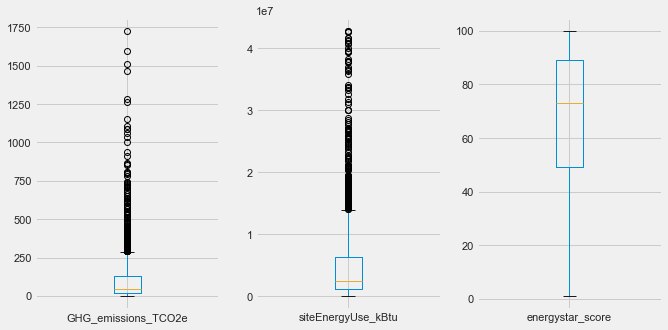

In [46]:
data[['GHG_emissions_TCO2e', 'siteEnergyUse_kBtu', 'energystar_score']].plot(kind='box', figsize=(10,5), subplots=['electricity_kWh', 'GHG_emissions_TCO2e'])

In [47]:
# look for pertinent categorical features to compare
data.select_dtypes(include=object).columns

Index(['buildingType', 'primaryPropertyType', 'neighborhood',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType', 'complianceStatus'],
      dtype='object')

### CO2 Emissions

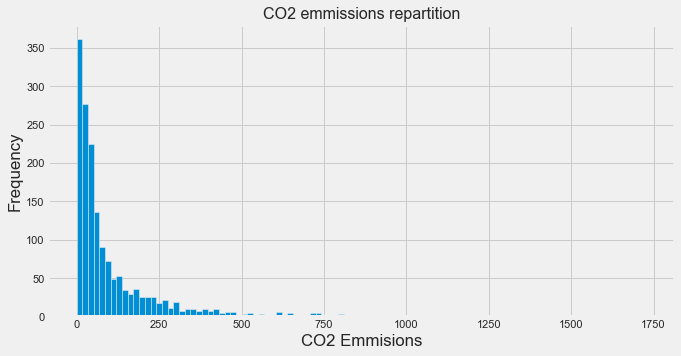

In [48]:
plt.figure(figsize=(10, 5))
plt.hist(data.GHG_emissions_TCO2e, bins=100, range=None, histtype='bar')
plt.xlabel('CO2 Emmisions')
plt.ylabel('Frequency')
plt.title('CO2 emmissions repartition', fontsize=16)
plt.show()

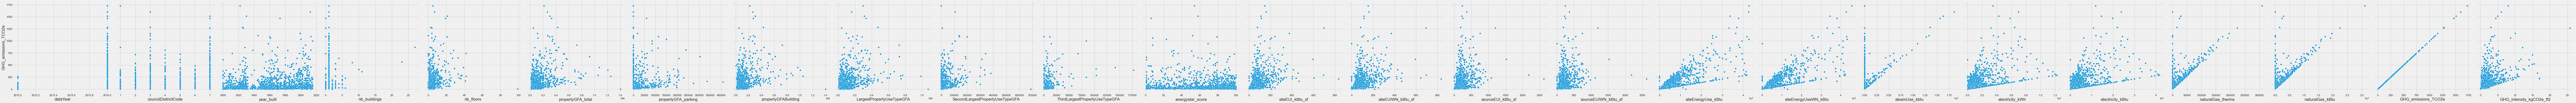

In [49]:
sns.pairplot(data, height=6,
             palette='GnBu_d',
             diag_kind=None,
             y_vars=['GHG_emissions_TCO2e'])
# double clic on plots to see their real size

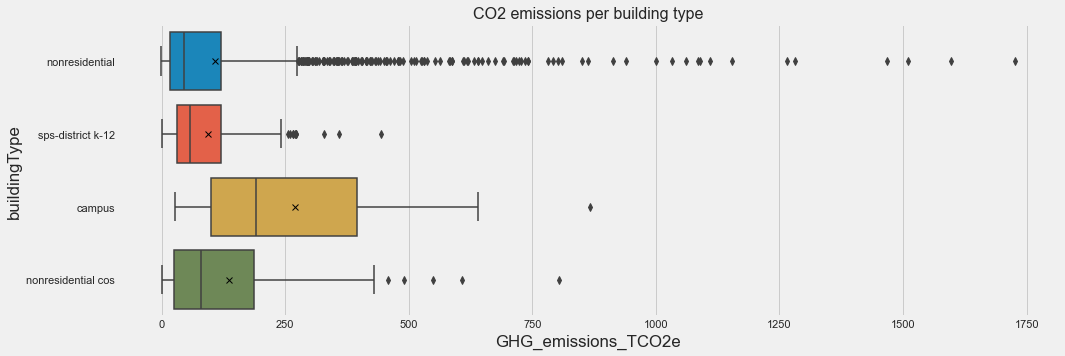

In [50]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('CO2 emissions per building type', fontsize=16)
sns.boxplot(y="buildingType", x="GHG_emissions_TCO2e", 
            data=data, 
            ax=ax, 
            linewidth=1.5, 
            showmeans=True, 
            meanprops={"marker":"x", "markeredgecolor":"black"})

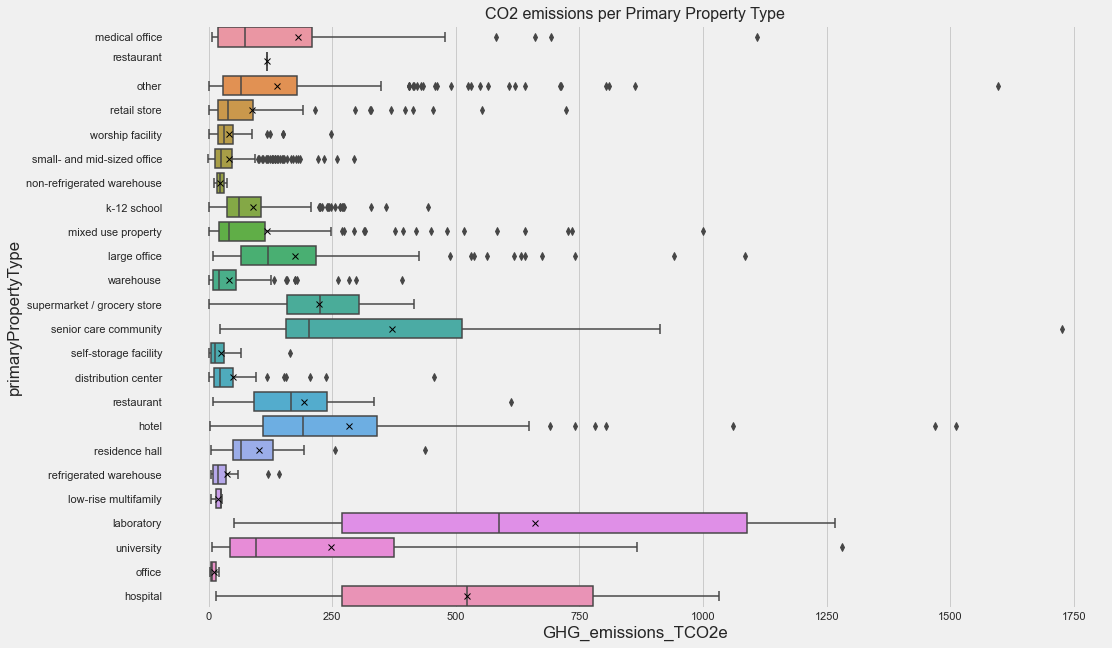

In [51]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('CO2 emissions per Primary Property Type', fontsize=16)
sns.boxplot(y="primaryPropertyType", x="GHG_emissions_TCO2e", 
            data=data, 
            ax=ax, 
            linewidth=1.5, 
            showmeans=True, 
            meanprops={"marker":"x", "markeredgecolor":"black"})

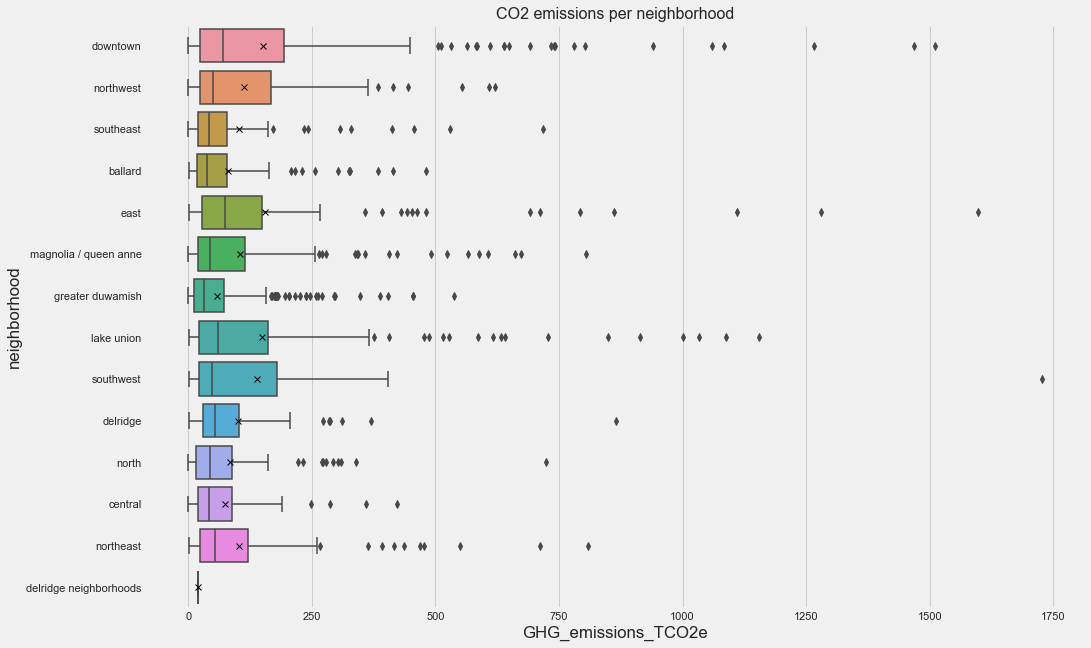

In [52]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('CO2 emissions per neighborhood', fontsize=16)
sns.boxplot(y="neighborhood", x="GHG_emissions_TCO2e", 
            data=data, 
            ax=ax, 
            linewidth=1.5, 
            showmeans=True, 
            meanprops={"marker":"x", "markeredgecolor":"black"})

### Energy consumption

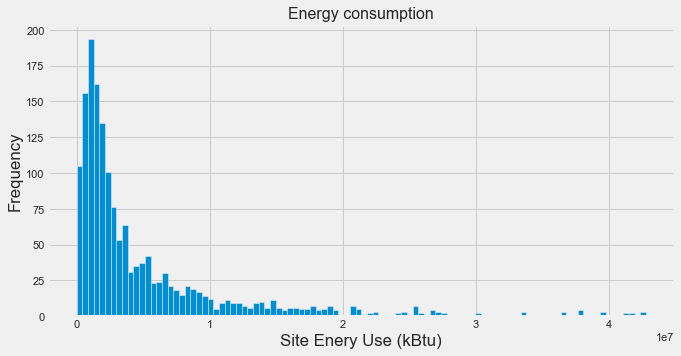

In [53]:
plt.figure(figsize=(10, 5))
plt.hist(data.siteEnergyUse_kBtu, bins=100, range=None, histtype='bar')
plt.xlabel('Site Enery Use (kBtu)')
plt.ylabel('Frequency')
plt.title('Energy consumption', fontsize=16)
plt.show()

<Figure size 432x288 with 0 Axes>

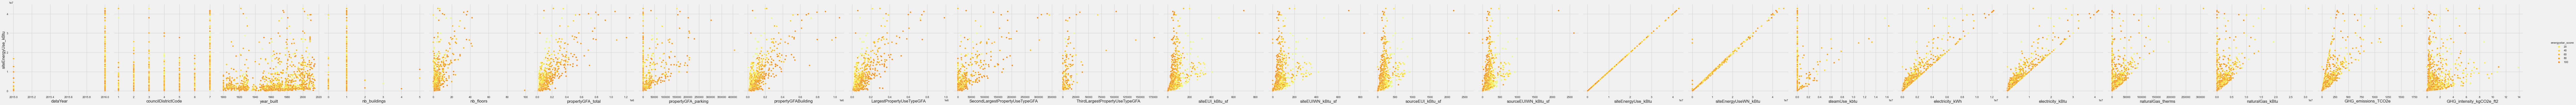

In [54]:
plt.figure()
sns.pairplot(data, height=6,
             hue='energystar_score',
             palette='Wistia',
             diag_kind=None,
             y_vars='siteEnergyUse_kBtu')
plt.show()

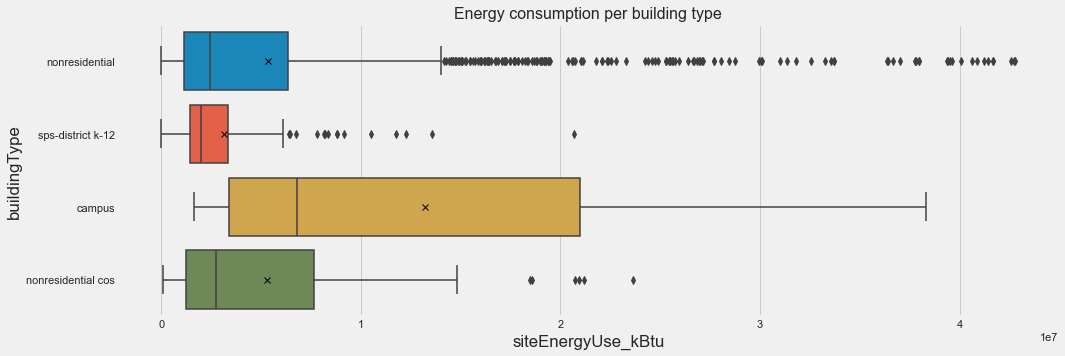

In [55]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Energy consumption per building type', fontsize=16)
sns.boxplot(y="buildingType", x="siteEnergyUse_kBtu", 
            data=data, 
            ax=ax, 
            linewidth=1.5, 
            showmeans=True, 
            meanprops={"marker":"x", "markeredgecolor":"black"})

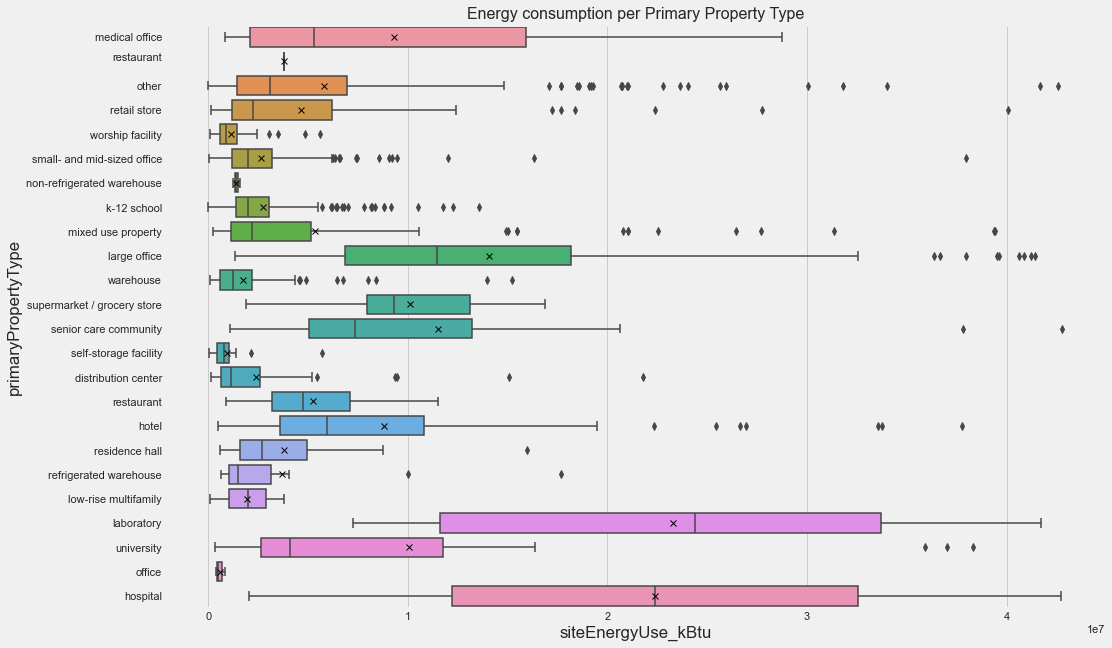

In [56]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Energy consumption per Primary Property Type', fontsize=16)
sns.boxplot(y="primaryPropertyType", x="siteEnergyUse_kBtu", 
            data=data, 
            ax=ax, 
            linewidth=1.5, 
            showmeans=True, 
            meanprops={"marker":"x", "markeredgecolor":"black"})

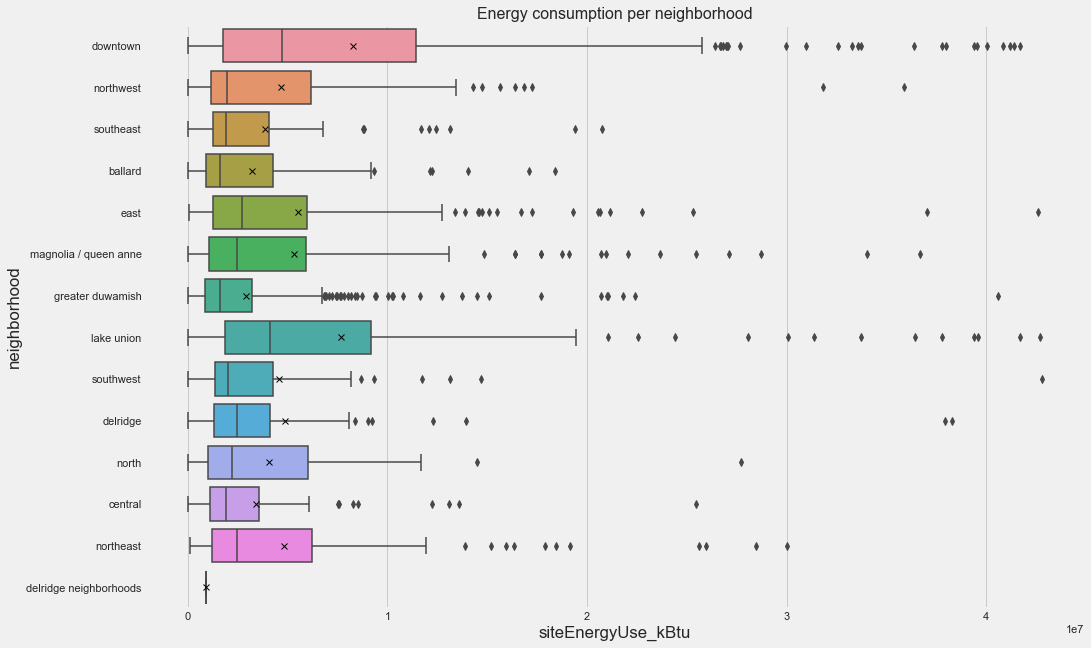

In [57]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Energy consumption per neighborhood', fontsize=16)
sns.boxplot(y="neighborhood", x="siteEnergyUse_kBtu", 
            data=data, 
            ax=ax, 
            linewidth=1.5, 
            showmeans=True, 
            meanprops={"marker":"x", "markeredgecolor":"black"})

### Correlation matrix

In [58]:
corr = data.corr(method = "pearson")
corr

,dataYear,councilDistrictCode,year_built,nb_buildings,nb_floors,propertyGFA_total,propertyGFA_parking,propertyGFABuilding,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,energystar_score,siteEUI_kBtu_sf,siteEUIWN_kBtu_sf,sourceEUI_kBtu_sf,sourceEUIWN_kBtu_sf,siteEnergyUse_kBtu,siteEnergyUseWN_kBtu,steamUse_kbtu,electricity_kWh,electricity_kBtu,naturalGas_therms,naturalGas_kBtu,GHG_emissions_TCO2e,GHG_intensity_kgCO2e_ft2
dataYear,1.000,-0.043,0.060,0.009,0.027,0.033,0.019,0.032,0.026,0.004,0.028,-0.029,-0.008,-0.011,0.003,0.003,0.031,0.030,0.009,0.027,0.027,0.023,0.023,0.028,0.010
councilDistrictCode,-0.043,1.000,-0.057,-0.032,0.286,0.214,0.188,0.188,0.172,0.215,0.114,0.089,0.076,0.067,0.102,0.097,0.204,0.195,0.110,0.220,0.220,0.037,0.037,0.137,0.011
year_built,0.060,-0.057,1.000,0.025,0.071,0.248,0.292,0.194,0.232,0.265,0.158,-0.038,0.104,0.098,0.145,0.141,0.225,0.221,-0.045,0.254,0.254,0.098,0.098,0.106,-0.028
nb_buildings,0.009,-0.032,0.025,1.000,-0.034,0.105,-0.005,0.124,0.162,-0.022,0.051,0.033,0.005,0.008,0.007,0.010,0.173,0.183,-0.010,0.157,0.157,0.141,0.141,0.133,0.015
nb_floors,0.027,0.286,0.071,-0.034,1.000,0.589,0.381,0.562,0.563,0.459,0.339,0.112,-0.010,-0.022,0.028,0.019,0.471,0.457,0.218,0.522,0.522,0.060,0.060,0.280,-0.070
propertyGFA_total,0.033,0.214,0.248,0.105,0.589,1.000,0.604,0.968,0.934,0.823,0.559,0.150,-0.014,-0.031,0.025,0.016,0.706,0.697,0.181,0.757,0.757,0.221,0.221,0.431,-0.114
propertyGFA_parking,0.019,0.188,0.292,-0.005,0.381,0.604,1.000,0.383,0.476,0.490,0.307,0.073,0.051,0.041,0.099,0.090,0.415,0.402,0.015,0.475,0.475,0.109,0.109,0.197,-0.099
propertyGFABuilding,0.032,0.188,0.194,0.124,0.562,0.968,0.383,1.000,0.931,0.802,0.556,0.155,-0.033,-0.049,-0.003,-0.010,0.686,0.681,0.205,0.727,0.727,0.221,0.221,0.437,-0.101
LargestPropertyUseTypeGFA,0.026,0.172,0.232,0.162,0.563,0.934,0.476,0.931,1.000,0.772,0.332,0.172,-0.041,-0.056,-0.010,-0.017,0.701,0.698,0.201,0.734,0.734,0.251,0.251,0.459,-0.096
SecondLargestPropertyUseTypeGFA,0.004,0.215,0.265,-0.022,0.459,0.823,0.490,0.802,0.772,1.000,0.534,0.192,-0.054,-0.076,-0.022,-0.030,0.549,0.540,0.125,0.587,0.587,0.119,0.119,0.307,-0.132


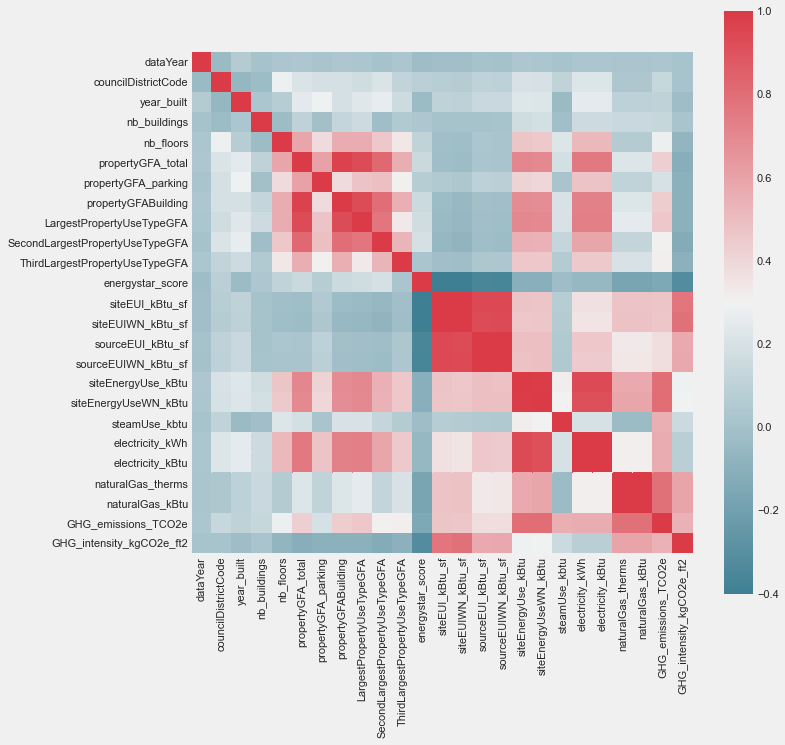

In [59]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

## Feature engineering

In [60]:
data.columns.tolist()

['dataYear',
 'buildingType',
 'primaryPropertyType',
 'councilDistrictCode',
 'neighborhood',
 'year_built',
 'nb_buildings',
 'nb_floors',
 'propertyGFA_total',
 'propertyGFA_parking',
 'propertyGFABuilding',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'energystar_score',
 'siteEUI_kBtu_sf',
 'siteEUIWN_kBtu_sf',
 'sourceEUI_kBtu_sf',
 'sourceEUIWN_kBtu_sf',
 'siteEnergyUse_kBtu',
 'siteEnergyUseWN_kBtu',
 'steamUse_kbtu',
 'electricity_kWh',
 'electricity_kBtu',
 'naturalGas_therms',
 'naturalGas_kBtu',
 'GHG_emissions_TCO2e',
 'GHG_intensity_kgCO2e_ft2',
 'complianceStatus']

In [61]:
# Building Age
data['buildingAge'] = data['dataYear'] - data['year_built']
# Then we can delete the columns used to calculate this new feature
data.drop(columns=['dataYear', 'year_built'], inplace=True)

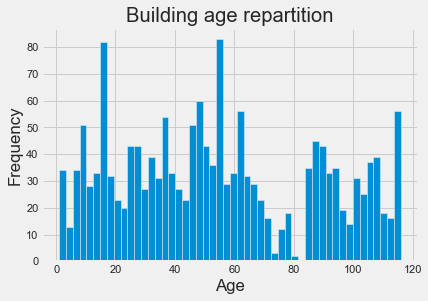

In [62]:
data.buildingAge.hist(bins=50)
plt.title('Building age repartition')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [63]:
# boolean columns to know if the building use electricity and/or gas  
data['consumeElectricity'] = (data['electricity_kWh']!=0) | (data['electricity_kBtu']!=0)
data['consumeGas'] = (data['naturalGas_kBtu']!=0) | (data['naturalGas_therms']!=0)
data['consumeSteam'] = (data['steamUse_kbtu']!=0) | (data['steamUse_kbtu']!=0)

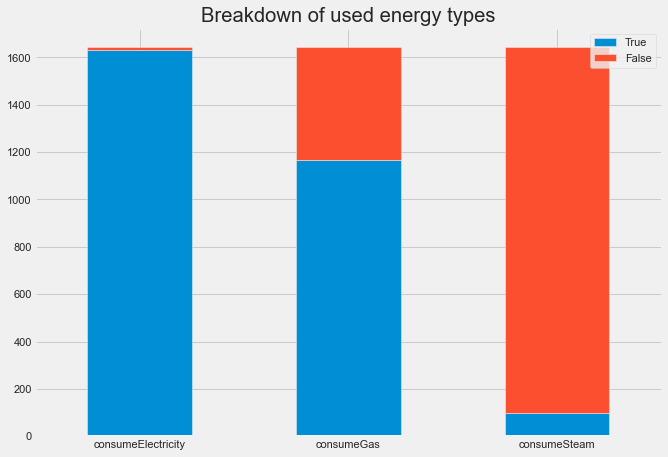

In [64]:
pd.DataFrame([data['consumeElectricity'].value_counts(), data['consumeGas'].value_counts(), data['consumeSteam'].value_counts()]).plot(kind='bar', stacked=True, rot=0, figsize=(10, 7))
plt.title('Breakdown of used energy types')
plt.show()

Almost all buildings consume electricity. So the consumeElec column contains very few false values. It is therefore not relevant to keep this column

In [65]:
data.drop(columns='consumeElectricity', inplace=True)

In [66]:
data.nb_buildings.value_counts()

1.000     1549
0.000       50
2.000       14
3.000       11
5.000        8
4.000        3
6.000        2
11.000       1
10.000       1
8.000        1
23.000       1
27.000       1
Name: nb_buildings, dtype: int64

## Data Leakage

**Target leakage**  
It can be considered that all the values calculated from the features to predict will not be available for predictions on new data and are therefore a source of leakage. As well as consumption values of the different energy sources for each building. 

In [67]:
# according to the column description in the metadata
leaky_predictors=['siteEUI_kBtu_sf', 
                  'siteEUIWN_kBtu_sf', 
                  'sourceEUI_kBtu_sf', 
                  'sourceEUIWN_kBtu_sf', 
                  'siteEnergyUseWN_kBtu', 
                  'electricity_kWh', 
                  'electricity_kBtu', 
                  'naturalGas_therms', 
                  'naturalGas_kBtu', 
                  'GHG_intensity_kgCO2e_ft2',
                  'steamUse_kbtu']

In [68]:
data.drop(columns=leaky_predictors, inplace=True)

## Save cleaned CSV

In [69]:
print("Remaining data : {} rows / {} columns".format(data.shape[0], data.shape[1]))

Remaining data : 1642 rows / 22 columns


In [71]:
data.to_csv('Pelec_04_data/cleaned_data.csv', sep=',', index=False)